### Oleksiy Anokhin (August 5, 2020)

### Starbucks App Customer Rewards Program

### MSCA 31008 | Data Mining Principles | Professor U. Pamuksuz | Team Project

**Business problem:**

Starbucks management would like to know whether it is possible to predict:

- the amount of money spent by a Starbucks customer (who received offer) during a certain period of time (month, quarter, year)

- the accuracy of prediction of the amount for a customer and its comparison of prediction for the amount combined with different Strabucks offers

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as cv
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import smogn
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report 
import pycaret
from pycaret.regression import *
import imblearn
from collections import Counter
import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier

C:\Users\oleks\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Set additional parameters
# Remove column display limits
pd.set_option('display.max_columns', None)
# pd.set_option('display.height', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style("white")

**1. Data cleaning**

In [3]:
# Read clean data
starbucks = pd.read_csv('starbucks.csv')

# Print
starbucks.head()

C:\Users\oleks\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,customer_id,offer_id,offer_received,received_time,offer_viewed,viewed_time,time_viewed_received,offer_completed,completed_time,time_completed_received,time_completed_viewed,transaction,transaction_time,amount,total_reward,age,income,male,membership_days,reward_each_time,difficulty,duration,email,mobile,social,web,bogo,discount,informational
0,0,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,1,0.0,1.0,6.0,6.0,1.0,60.0,60.0,54.0,1.0,60.0,16.06,2.0,45,62000.0,0,608,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1,1,fff8957ea8b240a6b5e634b6ee8eafcf,fafdcd668e3743c1bb461111dcafc2a4,1,408.0,1.0,432.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,71,56000.0,1,158,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,2,fff7576017104bcc8677a8d63322b5e1,fafdcd668e3743c1bb461111dcafc2a4,1,252.0,1.0,273.0,21.0,1.0,393.0,141.0,120.0,1.0,393.0,14.00,4.0,71,73000.0,1,268,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,3,fff3ba4757bd42088c044ca26d73817a,fafdcd668e3743c1bb461111dcafc2a4,1,0.0,1.0,6.0,6.0,1.0,6.0,6.0,0.0,1.0,6.0,20.98,2.0,69,83000.0,0,1040,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,4,fff29fb549084123bd046dbc5ceb4faa,fafdcd668e3743c1bb461111dcafc2a4,1,168.0,1.0,168.0,0.0,1.0,168.0,0.0,0.0,1.0,168.0,15.16,2.0,59,93000.0,0,329,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [4]:
# Dimensions
starbucks.shape

(147508, 30)

In [5]:
# Check columns
starbucks.dtypes

Unnamed: 0                   int64
customer_id                 object
offer_id                    object
offer_received               int64
received_time              float64
offer_viewed               float64
viewed_time                float64
time_viewed_received       float64
offer_completed            float64
completed_time             float64
time_completed_received    float64
time_completed_viewed      float64
transaction                float64
transaction_time           float64
amount                     float64
total_reward               float64
age                          int64
income                     float64
male                         int64
membership_days              int64
reward_each_time           float64
difficulty                 float64
duration                   float64
email                      float64
mobile                     float64
social                     float64
web                        float64
bogo                       float64
discount            

In [6]:
# Drop columns
starbucks = starbucks.drop(['Unnamed: 0'], axis = 1)

In [7]:
# Print
starbucks.head(5)

,customer_id,offer_id,offer_received,received_time,offer_viewed,viewed_time,time_viewed_received,offer_completed,completed_time,time_completed_received,time_completed_viewed,transaction,transaction_time,amount,total_reward,age,income,male,membership_days,reward_each_time,difficulty,duration,email,mobile,social,web,bogo,discount,informational
0,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,1,0.0,1.0,6.0,6.0,1.0,60.0,60.0,54.0,1.0,60.0,16.06,2.0,45,62000.0,0,608,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1,fff8957ea8b240a6b5e634b6ee8eafcf,fafdcd668e3743c1bb461111dcafc2a4,1,408.0,1.0,432.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,71,56000.0,1,158,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,fff7576017104bcc8677a8d63322b5e1,fafdcd668e3743c1bb461111dcafc2a4,1,252.0,1.0,273.0,21.0,1.0,393.0,141.0,120.0,1.0,393.0,14.00,4.0,71,73000.0,1,268,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,fff3ba4757bd42088c044ca26d73817a,fafdcd668e3743c1bb461111dcafc2a4,1,0.0,1.0,6.0,6.0,1.0,6.0,6.0,0.0,1.0,6.0,20.98,2.0,69,83000.0,0,1040,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,fff29fb549084123bd046dbc5ceb4faa,fafdcd668e3743c1bb461111dcafc2a4,1,168.0,1.0,168.0,0.0,1.0,168.0,0.0,0.0,1.0,168.0,15.16,2.0,59,93000.0,0,329,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [8]:
# Select columns
# Create two copies
starbucks_bogo = starbucks.copy()
starbucks_discount = starbucks.copy()

In [9]:
# Select columns
# Starbukcs_amount for predicting the total amount
starbucks = starbucks[['customer_id', 'offer_id', 'time_completed_viewed', 'amount', 'male', 'age', 'income', 'viewed_time',
                       'total_reward', 'membership_days', 'difficulty', 'duration', 'transaction', 'offer_viewed',
                       'offer_received', 'offer_completed']]

# Starbucks_bogo for predicting the total amount with bogo offer
starbucks_bogo = starbucks_bogo[['customer_id', 'offer_id', 'time_completed_viewed', 'amount', 'male', 'age', 'income', 
                                 'viewed_time',
                       'total_reward', 'membership_days', 'difficulty', 'duration', 'transaction', 'offer_viewed',
                       'offer_received', 'offer_completed', 'bogo']]

# Starbucks_discount for predicting the 
starbucks_discount = starbucks_discount[['customer_id', 'offer_id', 'time_completed_viewed', 'amount', 'male', 'age', 
                                         'income', 'viewed_time',
                       'total_reward', 'membership_days', 'difficulty', 'duration', 'transaction', 'offer_viewed',
                       'offer_received', 'offer_completed', 'discount']]

In [10]:
# Print
starbucks.head()

,customer_id,offer_id,time_completed_viewed,amount,male,age,income,viewed_time,total_reward,membership_days,difficulty,duration,transaction,offer_viewed,offer_received,offer_completed
0,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,54.0,16.06,0,45,62000.0,6.0,2.0,608,10.0,10.0,1.0,1.0,1,1.0
1,fff8957ea8b240a6b5e634b6ee8eafcf,fafdcd668e3743c1bb461111dcafc2a4,0.0,0.00,1,71,56000.0,432.0,0.0,158,10.0,10.0,0.0,1.0,1,0.0
2,fff7576017104bcc8677a8d63322b5e1,fafdcd668e3743c1bb461111dcafc2a4,120.0,14.00,1,71,73000.0,273.0,4.0,268,10.0,10.0,1.0,1.0,1,1.0
3,fff3ba4757bd42088c044ca26d73817a,fafdcd668e3743c1bb461111dcafc2a4,0.0,20.98,0,69,83000.0,6.0,2.0,1040,10.0,10.0,1.0,1.0,1,1.0
4,fff29fb549084123bd046dbc5ceb4faa,fafdcd668e3743c1bb461111dcafc2a4,0.0,15.16,0,59,93000.0,168.0,2.0,329,10.0,10.0,1.0,1.0,1,1.0


In [11]:
# Print dimensions
print(starbucks.shape)
print(starbucks_bogo.shape)
print(starbucks_discount.shape)

(147508, 16)
(147508, 17)
(147508, 17)


In [12]:
# Check NAs
starbucks.isnull().sum(axis = 0)

customer_id              0
offer_id                 0
time_completed_viewed    0
amount                   0
male                     0
age                      0
income                   0
viewed_time              0
total_reward             0
membership_days          0
difficulty               0
duration                 0
transaction              0
offer_viewed             0
offer_received           0
offer_completed          0
dtype: int64

In [13]:
# Drop rows where offer_id = 0 and amount = 0

# For starbucks
starbucks = starbucks[starbucks.offer_id != 0]
starbucks = starbucks[starbucks.amount > 0]

# For bogo
starbucks_bogo = starbucks_bogo[starbucks_bogo.offer_id != 0]
starbucks_bogo = starbucks_bogo[starbucks_bogo.amount > 0]

# For discount
starbucks_discount = starbucks_discount[starbucks_discount.offer_id != 0]
starbucks_discount = starbucks_discount[starbucks_discount.amount > 0]

In [14]:
# Print dimensions
print(starbucks.shape)
print(starbucks_bogo.shape)
print(starbucks_discount.shape)

(55032, 16)
(55032, 17)
(55032, 17)


In [15]:
# Check correlation for standartized data
cor = starbucks.corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

difficulty       total_reward      0.615878
duration         viewed_time       0.639321
                 total_reward      0.580373
                 difficulty        0.905077
offer_viewed     viewed_time       0.827383
                 total_reward      0.632833
                 difficulty        0.643597
                 duration          0.775759
offer_received   viewed_time       0.703953
                 total_reward      0.705887
                 difficulty        0.842075
                 duration          0.945997
                 offer_viewed      0.850820
offer_completed  viewed_time       0.703953
                 total_reward      0.705887
                 difficulty        0.842075
                 duration          0.945997
                 offer_viewed      0.850820
                 offer_received    1.000000
dtype: float64

In [16]:
# Print
starbucks.head(5)

,customer_id,offer_id,time_completed_viewed,amount,male,age,income,viewed_time,total_reward,membership_days,difficulty,duration,transaction,offer_viewed,offer_received,offer_completed
0,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,54.0,16.06,0,45,62000.0,6.0,2.0,608,10.0,10.0,1.0,1.0,1,1.0
2,fff7576017104bcc8677a8d63322b5e1,fafdcd668e3743c1bb461111dcafc2a4,120.0,14.00,1,71,73000.0,273.0,4.0,268,10.0,10.0,1.0,1.0,1,1.0
3,fff3ba4757bd42088c044ca26d73817a,fafdcd668e3743c1bb461111dcafc2a4,0.0,20.98,0,69,83000.0,6.0,2.0,1040,10.0,10.0,1.0,1.0,1,1.0
4,fff29fb549084123bd046dbc5ceb4faa,fafdcd668e3743c1bb461111dcafc2a4,0.0,15.16,0,59,93000.0,168.0,2.0,329,10.0,10.0,1.0,1.0,1,1.0
5,ffdefcac307f4ca99ac1ebd51470f106,fafdcd668e3743c1bb461111dcafc2a4,54.0,24.41,0,87,47000.0,0.0,2.0,498,10.0,10.0,1.0,1.0,1,1.0


In [17]:
# Manipulate Starbucks dataframe
starbucks_grouped = starbucks.groupby('customer_id').agg({'amount':['sum'], 
                                                          'male':['mean'],
                                                          'income':['mean'],
                                                          'viewed_time':['mean'],
                                                          'total_reward':['sum'],
                                                          'membership_days':['mean'],
                                                          'difficulty':['sum'],
                                                          'duration':['sum'],
                                                          'transaction':['max'],
                                                          'offer_viewed':['max'],
                                                          'offer_received':['max'],
                                                          'offer_completed':['max'],
                                                          'age':['mean']}).reset_index()

# Manipulate Starbucks dataframe
starbucks_bogo_grouped = starbucks_bogo.groupby('customer_id').agg({'amount':['sum'], 
                                                          'male':['mean'],
                                                          'income':['mean'],
                                                          'viewed_time':['mean'],
                                                          'total_reward':['sum'],
                                                          'membership_days':['mean'],
                                                          'difficulty':['sum'],
                                                          'duration':['sum'],
                                                          'transaction':['max'],
                                                          'offer_viewed':['max'],
                                                          'offer_received':['max'],
                                                          'offer_completed':['max'],
                                                          'bogo':['sum'],
                                                          'age':['mean']}).reset_index()

# Manipulate Starbucks dataframe
starbucks_discount_grouped = starbucks_discount.groupby('customer_id').agg({'amount':['sum'], 
                                                          'male':['mean'],
                                                          'income':['mean'],
                                                          'viewed_time':['mean'],
                                                          'total_reward':['sum'],
                                                          'membership_days':['mean'],
                                                          'difficulty':['sum'],
                                                          'duration':['sum'],
                                                          'transaction':['max'],
                                                          'offer_viewed':['max'],
                                                          'offer_received':['max'],
                                                          'offer_completed':['max'],
                                                          'discount':['sum'],
                                                          'age':['mean']}).reset_index()

In [18]:
# Print
starbucks_grouped.head(20)

,customer_id,amount,male,income,viewed_time,total_reward,membership_days,difficulty,duration,transaction,offer_viewed,offer_received,offer_completed,age
,,sum,mean,mean,mean,sum,mean,sum,sum,max,max,max,max,mean
0,0009655768c64bdeb2e877511632db8f,127.60,1,72000.0,124.500000,9.0,461,25.0,22.0,1.0,1.0,1,1.0,33
1,0020c2b971eb4e9188eac86d93036a77,214.10,0,90000.0,54.750000,14.0,874,20.0,15.0,1.0,1.0,1,1.0,59
2,0020ccbbb6d84e358d3414a3ff76cffd,154.05,0,60000.0,91.500000,13.0,622,17.0,19.0,1.0,1.0,1,1.0,24
3,003d66b6608740288d6cc97a6903f4f0,48.34,0,73000.0,21.176471,9.0,400,30.0,20.0,1.0,1.0,1,1.0,26
4,00426fe3ffde4c6b9cb9ad6d077a13ea,68.51,0,65000.0,10.941176,2.0,716,10.0,10.0,1.0,1.0,1,1.0,19
5,004b041fbfe44859945daa2c7f79ee64,138.36,0,74000.0,181.000000,7.0,79,15.0,15.0,1.0,1.0,1,1.0,55
6,004c5799adbf42868b9cff0396190900,347.38,1,99000.0,87.300000,24.0,847,25.0,22.0,1.0,1.0,1,1.0,54
7,005500a7188546ff8a767329a2f7c76a,20.36,1,47000.0,0.000000,5.0,229,5.0,7.0,1.0,0.0,1,1.0,56
8,0056df74b63b4298809f0b375a304cf4,144.14,1,91000.0,135.600000,13.0,704,32.0,24.0,1.0,1.0,1,1.0,54


In [19]:
# Check dimensions - 14610 unique customers, the same as the team's results
print(starbucks_grouped.shape)
print(starbucks_bogo_grouped.shape)
print(starbucks_discount_grouped.shape)

(12529, 14)
(12529, 15)
(12529, 15)


In [20]:
# Drop the second layer of multi index
starbucks_grouped = starbucks_grouped.droplevel(1, axis = 1) 
starbucks_bogo_grouped = starbucks_bogo_grouped.droplevel(1, axis = 1) 
starbucks_discount_grouped = starbucks_discount_grouped.droplevel(1, axis = 1) 

In [21]:
# Print
starbucks_grouped.head()

,customer_id,amount,male,income,viewed_time,total_reward,membership_days,difficulty,duration,transaction,offer_viewed,offer_received,offer_completed,age
0,0009655768c64bdeb2e877511632db8f,127.60,1,72000.0,124.500000,9.0,461,25.0,22.0,1.0,1.0,1,1.0,33
1,0020c2b971eb4e9188eac86d93036a77,214.10,0,90000.0,54.750000,14.0,874,20.0,15.0,1.0,1.0,1,1.0,59
2,0020ccbbb6d84e358d3414a3ff76cffd,154.05,0,60000.0,91.500000,13.0,622,17.0,19.0,1.0,1.0,1,1.0,24
3,003d66b6608740288d6cc97a6903f4f0,48.34,0,73000.0,21.176471,9.0,400,30.0,20.0,1.0,1.0,1,1.0,26
4,00426fe3ffde4c6b9cb9ad6d077a13ea,68.51,0,65000.0,10.941176,2.0,716,10.0,10.0,1.0,1.0,1,1.0,19


In [22]:
# Drop 0 column
starbucks = starbucks_grouped.drop(starbucks_grouped.columns[[0]], axis = 1)
starbucks_bogo = starbucks_bogo_grouped.drop(starbucks_bogo_grouped.columns[[0]], axis = 1)
starbucks_discount = starbucks_discount_grouped.drop(starbucks_discount_grouped.columns[[0]], axis = 1)

In [23]:
# Print
starbucks.head(20)

,amount,male,income,viewed_time,total_reward,membership_days,difficulty,duration,transaction,offer_viewed,offer_received,offer_completed,age
0,127.60,1,72000.0,124.500000,9.0,461,25.0,22.0,1.0,1.0,1,1.0,33
1,214.10,0,90000.0,54.750000,14.0,874,20.0,15.0,1.0,1.0,1,1.0,59
2,154.05,0,60000.0,91.500000,13.0,622,17.0,19.0,1.0,1.0,1,1.0,24
3,48.34,0,73000.0,21.176471,9.0,400,30.0,20.0,1.0,1.0,1,1.0,26
4,68.51,0,65000.0,10.941176,2.0,716,10.0,10.0,1.0,1.0,1,1.0,19
5,138.36,0,74000.0,181.000000,7.0,79,15.0,15.0,1.0,1.0,1,1.0,55
6,347.38,1,99000.0,87.300000,24.0,847,25.0,22.0,1.0,1.0,1,1.0,54
7,20.36,1,47000.0,0.000000,5.0,229,5.0,7.0,1.0,0.0,1,1.0,56
8,144.14,1,91000.0,135.600000,13.0,704,32.0,24.0,1.0,1.0,1,1.0,54
9,375.12,0,119000.0,59.142857,32.0,231,50.0,29.0,1.0,1.0,1,1.0,58


In [24]:
# Check types
starbucks.dtypes

amount             float64
male                 int64
income             float64
viewed_time        float64
total_reward       float64
membership_days      int64
difficulty         float64
duration           float64
transaction        float64
offer_viewed       float64
offer_received       int64
offer_completed    float64
age                  int64
dtype: object

**2. EDA**

I will do EDA only for `starbucks` dataframe, becase all parameters are the same in two other dataframes.

In [25]:
starbucks.describe()

,amount,male,income,viewed_time,total_reward,membership_days,difficulty,duration,transaction,offer_viewed,offer_received,offer_completed,age
count,12529.000000,12529.000000,12529.000000,12529.000000,12529.000000,12529.000000,12529.000000,12529.000000,12529.0,12529.000000,12529.000000,12529.000000,12529.000000
mean,80.115449,0.555032,67034.719451,227.081988,12.612978,557.669008,20.464682,16.058584,1.0,0.900152,0.942374,0.942374,54.968154
std,110.458490,0.496982,21768.189604,164.829708,8.822421,418.891350,12.639385,8.778916,0.0,0.299810,0.233045,0.233045,17.201904
min,0.290000,0.000000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,18.000000
25%,23.020000,0.000000,51000.000000,78.000000,5.000000,231.000000,10.000000,10.000000,1.0,1.000000,1.000000,1.000000,43.000000
50%,52.900000,1.000000,66000.000000,222.000000,12.000000,436.000000,20.000000,17.000000,1.0,1.000000,1.000000,1.000000,56.000000
75%,94.700000,1.000000,82000.000000,352.000000,18.000000,835.000000,30.000000,22.000000,1.0,1.000000,1.000000,1.000000,67.000000
max,1754.290000,1.000000,120000.000000,714.000000,55.000000,1823.000000,62.000000,46.000000,1.0,1.000000,1.000000,1.000000,101.000000


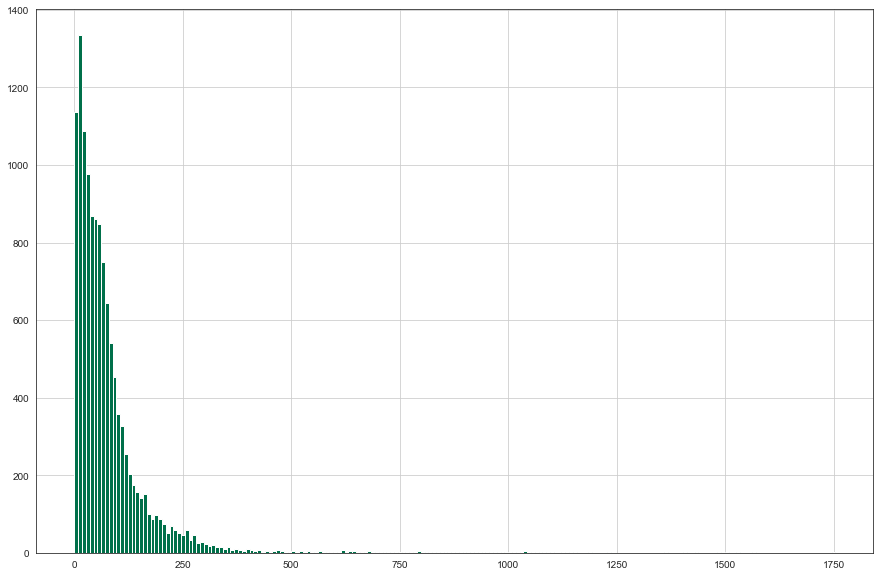

In [26]:
# Histogram of total payments
starbucks.amount.hist(bins = 200, color = '#00704A')

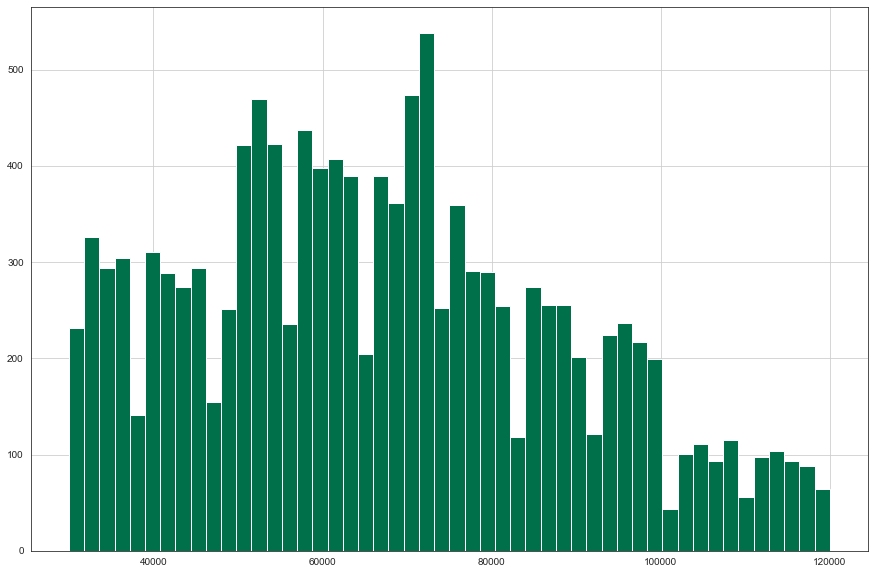

In [27]:
# Histogram of income
starbucks.income.hist(bins = 50, color = '#00704A')

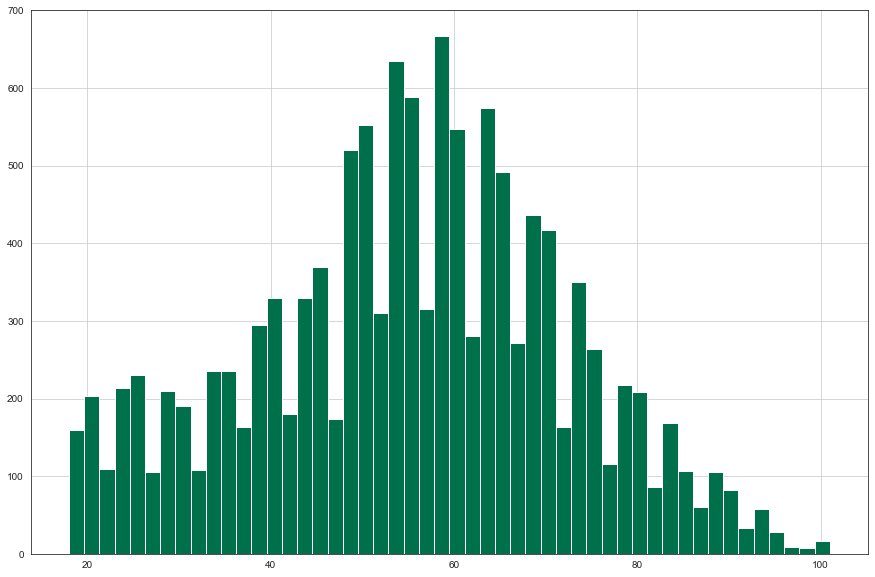

In [28]:
# Histogram of age
starbucks.age.hist(bins = 50, color = '#00704A')

**3. Feature Engineering**

In [29]:
# Standartize columns for three dataframes
scaler = StandardScaler()
starbucks[['income', 'age', 'viewed_time', 'total_reward', 'membership_days', 'difficulty', 
           'duration']] = scaler.fit_transform(starbucks[['income', 'age', 'viewed_time', 
                                                          'total_reward', 'membership_days', 'difficulty', 'duration']])

starbucks_bogo[['income', 'age', 'viewed_time', 'total_reward', 'membership_days', 'difficulty', 
           'duration']] = scaler.fit_transform(starbucks_bogo[['income', 'age', 'viewed_time', 
                                                          'total_reward', 'membership_days', 'difficulty', 'duration']])

starbucks_discount[['income', 'age', 'viewed_time', 'total_reward', 'membership_days', 'difficulty', 
           'duration']] = scaler.fit_transform(starbucks_discount[['income', 'age', 'viewed_time', 
                                                          'total_reward', 'membership_days', 'difficulty', 'duration']])

In [30]:
# Print
starbucks.head()

,amount,male,income,viewed_time,total_reward,membership_days,difficulty,duration,transaction,offer_viewed,offer_received,offer_completed,age
0,127.60,1,0.228107,-0.622376,-0.409539,-0.230783,0.358839,0.676809,1.0,1.0,1,1.0,-1.277128
1,214.10,0,1.055035,-1.045557,0.157222,0.755193,-0.036766,-0.120587,1.0,1.0,1,1.0,0.234393
2,154.05,0,-0.323178,-0.822591,0.043870,0.153581,-0.274129,0.335068,1.0,1.0,1,1.0,-1.800347
3,48.34,0,0.274048,-1.249251,-0.409539,-0.376411,0.754443,0.448982,1.0,1.0,1,1.0,-1.684076
4,68.51,0,-0.093476,-1.311350,-1.203003,0.377991,-0.827975,-0.690157,1.0,1.0,1,1.0,-2.091024


In [31]:
# Save as csv
# starbucks.to_csv('starbucks_for_smote.csv')

**SMOTE technique**

In [32]:
# Create a copy
starbucks_smote = starbucks.copy()

In [33]:
# Print
starbucks_smote.head()

,amount,male,income,viewed_time,total_reward,membership_days,difficulty,duration,transaction,offer_viewed,offer_received,offer_completed,age
0,127.60,1,0.228107,-0.622376,-0.409539,-0.230783,0.358839,0.676809,1.0,1.0,1,1.0,-1.277128
1,214.10,0,1.055035,-1.045557,0.157222,0.755193,-0.036766,-0.120587,1.0,1.0,1,1.0,0.234393
2,154.05,0,-0.323178,-0.822591,0.043870,0.153581,-0.274129,0.335068,1.0,1.0,1,1.0,-1.800347
3,48.34,0,0.274048,-1.249251,-0.409539,-0.376411,0.754443,0.448982,1.0,1.0,1,1.0,-1.684076
4,68.51,0,-0.093476,-1.311350,-1.203003,0.377991,-0.827975,-0.690157,1.0,1.0,1,1.0,-2.091024


Now we need a dataset, which has classification elements - 0 and 1.

The problem here - this decision is quiet arbitrary, we have tremendous outliers on both sides of our dataset. 

So how to assign 1 and 0, how many rows to select?

I would try to make a decision, based on quantiles

In [33]:
# Check quantiles
starbucks_smote.quantile([.1, .25, .5, .95], axis = 0) 

,amount,male,income,viewed_time,total_reward,membership_days,difficulty,duration,transaction,offer_viewed,offer_received,offer_completed,age
0.10,9.750,0.0,-1.333867,-1.377731,-1.203003,-1.080679,-1.223580,-1.259726,1.0,1.0,1.0,1.0,-1.451534
0.25,23.020,0.0,-0.736642,-0.904497,-0.862947,-0.779873,-0.827975,-0.690157,1.0,1.0,1.0,1.0,-0.695774
0.50,52.900,1.0,-0.047535,-0.030833,-0.069482,-0.290466,-0.036766,0.107240,1.0,1.0,1.0,1.0,0.059987
0.95,238.338,1.0,1.836022,1.701934,1.857503,2.123144,1.703894,1.702034,1.0,1.0,1.0,1.0,1.629643


In [34]:
# Now I would like to split the dataframe into two parts
starbucks0 = starbucks_smote[starbucks_smote.amount < 239]
starbucks1 = starbucks_smote[starbucks_smote.amount >= 239]

In [35]:
# Print dimensions
print(starbucks0.shape)
print(starbucks1.shape)

(11908, 13)
(621, 13)


In [36]:
# Now we need to assign 0 and 1 to these columns
starbucks0['label'] = 0
starbucks1['label'] = 1

C:\Users\oleks\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\oleks\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
# Check new columns
print(starbucks0.head(2))
print(starbucks1.head(2))

   amount  male    income  viewed_time  total_reward  membership_days  \
0   127.6     1  0.228107    -0.622376     -0.409539        -0.230783   
1   214.1     0  1.055035    -1.045557      0.157222         0.755193   

   difficulty  duration  transaction  offer_viewed  offer_received  \
0    0.358839  0.676809          1.0           1.0               1   
1   -0.036766 -0.120587          1.0           1.0               1   

   offer_completed       age  label  
0              1.0 -1.277128      0  
1              1.0  0.234393      0  
   amount  male    income  viewed_time  total_reward  membership_days  \
6  347.38     1  1.468499    -0.848073      1.290743         0.690734   
9  375.12     0  2.387307    -1.018905      2.197560        -0.779873   

   difficulty  duration  transaction  offer_viewed  offer_received  \
6    0.358839  0.676809          1.0           1.0               1   
9    2.336862  1.474206          1.0           1.0               1   

   offer_completed      

In [38]:
# Now we need to rbind() two dataframes
starbucks_smoted = starbucks0.append(starbucks1)

In [39]:
# Dimensions
starbucks_smoted.shape
# We can see that now we have the same dataframe but with different classes assigned

(12529, 14)

In [40]:
# Print
starbucks_smoted.head()

,amount,male,income,viewed_time,total_reward,membership_days,difficulty,duration,transaction,offer_viewed,offer_received,offer_completed,age,label
0,127.60,1,0.228107,-0.622376,-0.409539,-0.230783,0.358839,0.676809,1.0,1.0,1,1.0,-1.277128,0
1,214.10,0,1.055035,-1.045557,0.157222,0.755193,-0.036766,-0.120587,1.0,1.0,1,1.0,0.234393,0
2,154.05,0,-0.323178,-0.822591,0.043870,0.153581,-0.274129,0.335068,1.0,1.0,1,1.0,-1.800347,0
3,48.34,0,0.274048,-1.249251,-0.409539,-0.376411,0.754443,0.448982,1.0,1.0,1,1.0,-1.684076,0
4,68.51,0,-0.093476,-1.311350,-1.203003,0.377991,-0.827975,-0.690157,1.0,1.0,1,1.0,-2.091024,0


In [41]:
# Save smote dataset to csv
# starbucks_smoted.to_csv("starbucks_smoted.csv")

**Now we can continue our notebook.**

In [42]:
# Convert amount to log

# Create a copy
starbucks_log = starbucks.copy()
starbucks_log.amount = np.log(starbucks_log.amount)

# For bogo df
starbucks_bogo_log = starbucks_bogo.copy()
starbucks_bogo_log.amount = np.log(starbucks_bogo_log.amount)

# For discount df
starbucks_discount_log = starbucks_discount.copy()
starbucks_discount_log.amount = np.log(starbucks_discount_log.amount)

In [43]:
# Print
starbucks_log.head()

,amount,male,income,viewed_time,total_reward,membership_days,difficulty,duration,transaction,offer_viewed,offer_received,offer_completed,age
0,4.848900,1,0.228107,-0.622376,-0.409539,-0.230783,0.358839,0.676809,1.0,1.0,1,1.0,-1.277128
1,5.366443,0,1.055035,-1.045557,0.157222,0.755193,-0.036766,-0.120587,1.0,1.0,1,1.0,0.234393
2,5.037277,0,-0.323178,-0.822591,0.043870,0.153581,-0.274129,0.335068,1.0,1.0,1,1.0,-1.800347
3,3.878259,0,0.274048,-1.249251,-0.409539,-0.376411,0.754443,0.448982,1.0,1.0,1,1.0,-1.684076
4,4.226980,0,-0.093476,-1.311350,-1.203003,0.377991,-0.827975,-0.690157,1.0,1.0,1,1.0,-2.091024


In [44]:
# Dimensions
starbucks_log.shape

(12529, 13)

In [45]:
# Remove Inf values after log transformation

# For Starbucks df
starbucks_log = starbucks_log[np.isfinite(starbucks_log).all(1)]
starbucks_log.head()

# For bogo df
starbucks_bogo_log = starbucks_bogo_log[np.isfinite(starbucks_bogo_log).all(1)]
starbucks_bogo_log.head()

# For discount df
starbucks_discount_log = starbucks_discount_log[np.isfinite(starbucks_discount_log).all(1)]
starbucks_discount_log.head()

,amount,male,income,viewed_time,total_reward,membership_days,difficulty,duration,transaction,offer_viewed,offer_received,offer_completed,discount,age
0,4.848900,1,0.228107,-0.622376,-0.409539,-0.230783,0.358839,0.676809,1.0,1.0,1,1.0,2.0,-1.277128
1,5.366443,0,1.055035,-1.045557,0.157222,0.755193,-0.036766,-0.120587,1.0,1.0,1,1.0,1.0,0.234393
2,5.037277,0,-0.323178,-0.822591,0.043870,0.153581,-0.274129,0.335068,1.0,1.0,1,1.0,1.0,-1.800347
3,3.878259,0,0.274048,-1.249251,-0.409539,-0.376411,0.754443,0.448982,1.0,1.0,1,1.0,2.0,-1.684076
4,4.226980,0,-0.093476,-1.311350,-1.203003,0.377991,-0.827975,-0.690157,1.0,1.0,1,1.0,1.0,-2.091024


In [46]:
# Dimensions
starbucks_log.shape

(12529, 13)

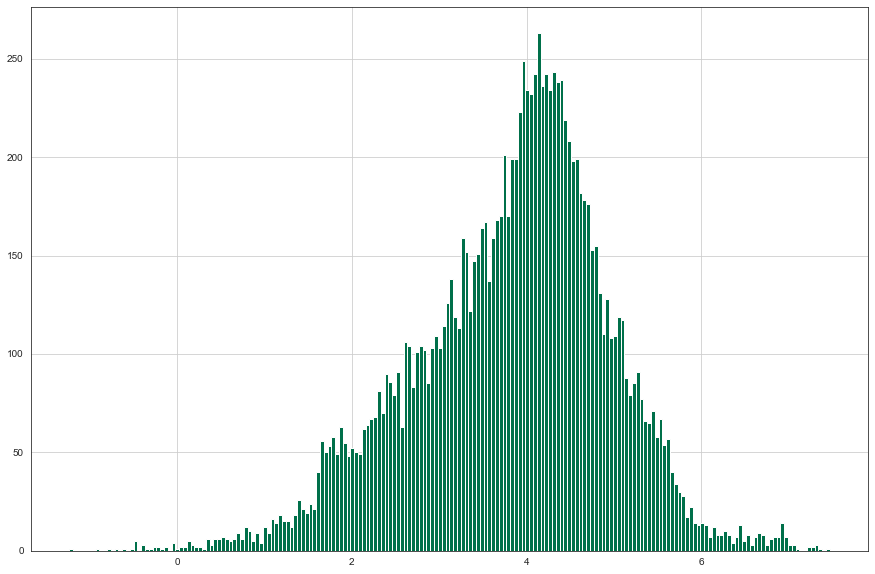

In [47]:
# Histogram of total payments
starbucks_log.amount.hist(bins = 200, color = '#00704A')

**4. Modelling**

First, we will build models for predicting the accuracy of amount spent by a customer during a given period of time (month, quarter, year).

- RMSE (test) > RMSE (train) => Overfitting of the data

- RMSE (test) < RMSE (train) => Underfitting of the data

**4.1. Decision Tree**

In [51]:
# Print
starbucks_smoted.head()

,amount,male,income,viewed_time,total_reward,membership_days,difficulty,duration,transaction,offer_viewed,offer_received,offer_completed,age,label
0,127.60,1,0.228107,-0.622376,-0.409539,-0.230783,0.358839,0.676809,1.0,1.0,1,1.0,-1.277128,0
1,214.10,0,1.055035,-1.045557,0.157222,0.755193,-0.036766,-0.120587,1.0,1.0,1,1.0,0.234393,0
2,154.05,0,-0.323178,-0.822591,0.043870,0.153581,-0.274129,0.335068,1.0,1.0,1,1.0,-1.800347,0
3,48.34,0,0.274048,-1.249251,-0.409539,-0.376411,0.754443,0.448982,1.0,1.0,1,1.0,-1.684076,0
4,68.51,0,-0.093476,-1.311350,-1.203003,0.377991,-0.827975,-0.690157,1.0,1.0,1,1.0,-2.091024,0


In [67]:
# Split data
y = starbucks_smoted.iloc[:, -1]
X = starbucks_smoted.drop('label', axis = 1)

# Print y
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [68]:
# Count labels by type
counter = Counter(y)
print(counter)

Counter({0: 11908, 1: 621})


In [69]:
# Transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [70]:
 # Print the oversampled dataset
counter = Counter(y)
print(counter)

Counter({0: 11908, 1: 11908})


In [71]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [48]:
# # Split data
# y = starbucks_log.iloc[:, 0]
# X = starbucks_log.drop('amount', axis = 1)

# # Print y
# y.head(5)

In [60]:
# build the model
dtr = DecisionTreeRegressor(#max_depth = 10
min_samples_split = 0.1,
min_samples_leaf = 1, 
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# fit data to the model
dtr.fit(X_train, y_train)

# Compute y_pred
dtr_y_pred = dtr.predict(X_test)

# Compute mse_dt
mse_dtr = MSE(y_test, dtr_y_pred)

# Compute rmse_dt
rmse_dtr = mse_dtr**(1/2)

# Print rmse_dt
print("Test set RMSE of Decision Tree Regression: {:.5f}".format(rmse_dtr))

# CV RMSE validation

# Compute the array containing the 10-folds CV MSEs
dtr_MSE_CV_scores = - cross_val_score(dtr, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
dtr_RMSE_CV = (dtr_MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE from decision tree regression: {:.5f}'.format(dtr_RMSE_CV))

# Fit dt to the training set
dtr.fit(X_train, y_train)

# Predict the labels of the training set
dtr_y_pred_train = dtr.predict(X_train)

# Evaluate the training set RMSE of dt
dtr_RMSE_train = (MSE(y_train, dtr_y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE from decision tree regression: {:.5f}'.format(dtr_RMSE_train))

Test set RMSE of Decision Tree Regression: 0.00000
CV RMSE from decision tree regression: 0.00000
Train RMSE from decision tree regression: 0.00000


**4.2. Random Forest**

In [156]:
# # Split data
# y = starbucks_log.iloc[:, 0]
# X = starbucks_log.drop('amount', axis = 1)

# # Print y
# y.head(5)

0    4.848900
1    5.366443
2    5.037277
3    3.878259
4    4.226980
Name: amount, dtype: float64

In [61]:
# Set seed for reproducibility
SEED = 1

# Split dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = \
train_test_split(X, y,
test_size = 0.2,
random_state = SEED)

In [62]:
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators = 400,
min_samples_split = 0.1,
min_samples_leaf = 1,
random_state = SEED)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)
y_pred_train=rf.predict(X_train)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.5f}'.format(rmse_test))
print('Train set RMSE of rf: {:.5f}'.format(rmse_train))

# Compute the array containing the 10-folds CV MSEs
rf_MSE_CV_scores = - cross_val_score(rf, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

rf_RMSE_CV = (rf_MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE from random forest regression: {:.5f}'.format(rf_RMSE_CV))

Test set RMSE of rf: 0.00000
Train set RMSE of rf: 0.00049
CV RMSE from random forest regression: 0.00264


**4.3. Gradient Boosting**

In [159]:
# # Split data
# y = starbucks_log.iloc[:, 0]
# X = starbucks_log.drop('amount', axis = 1)

# # Print y
# y.head(5)

0    4.848900
1    5.366443
2    5.037277
3    3.878259
4    4.226980
Name: amount, dtype: float64

In [63]:
# Instantiate gb
gb = GradientBoostingRegressor(# max_depth = 10,
                               n_estimators = 400,
                               min_samples_split = 0.1,
                               min_samples_leaf = 1,
                               random_state = 1)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred_Gboost = gb.predict(X_test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute RMSE

rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)

# Print the test set RMSE
print('Test set RMSE of gb: {:.5f}'.format(rmse_test))
print('Train set RMSE of gb: {:.5f}'.format(rmse_train))

# Compute the array containing the 10-folds CV MSEs
gb_MSE_CV_scores = - cross_val_score(gb, X_train, y_train, cv = 10, 
                                  scoring = 'neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
gb_RMSE_CV = (gb_MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE from Gradient Boosting Regression: {:.5f}'.format(gb_RMSE_CV))

Test set RMSE of gb: 0.00000
Train set RMSE of gb: 0.00049
CV RMSE from Gradient Boosting Regression: 0.00000


**4.4. SVM**

In [161]:
# # Split data
# y = starbucks_log.iloc[:, 0]
# X = starbucks_log.drop('amount', axis = 1)

# # Print y
# y.head(5)

0    4.848900
1    5.366443
2    5.037277
3    3.878259
4    4.226980
Name: amount, dtype: float64

In [64]:
# Build the model
svr = SVR()

# fit data to the model
svr.fit(X_train, y_train)

# Compute y_pred
svr_y_pred = svr.predict(X_test)

# Compute mse_svr
mse_svr = MSE(y_test, svr_y_pred)

# Compute rmse_svr
rmse_svr = mse_svr**(1/2)

# Print rmse_dt
print("Test set RMSE of Support Vector Regression: {:.5f}".format(rmse_svr))

# CV RMSE validation

# Compute the array containing the 10-folds CV MSEs
svr_MSE_CV_scores = - cross_val_score(svr, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
svr_RMSE_CV = (svr_MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE from Support Vector Regression: {:.5f}'.format(svr_RMSE_CV))

# Predict the labels of the training set
svr_y_pred_train = svr.predict(X_train)

# Evaluate the training set RMSE of dt
svr_RMSE_train = (MSE(y_train, svr_y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE from Support Vector Regression: {:.5f}'.format(svr_RMSE_train))

Test set RMSE of Support Vector Regression: 0.12451
CV RMSE from Support Vector Regression: 0.12636
Train RMSE from Support Vector Regression: 0.12625


**4.5. KNN**

In [163]:
# # Split data
# y = starbucks_log.iloc[:, 0]
# X = starbucks_log.drop('amount', axis = 1)

# # Print y
# y.head(5)

0    4.848900
1    5.366443
2    5.037277
3    3.878259
4    4.226980
Name: amount, dtype: float64

In [72]:
# Build the model
knn = KNeighborsRegressor(leaf_size = 1)

# min_samples_split = 0.1,
# min_samples_leaf = 1,

# fit data to the model
knn.fit(X_train, y_train)

# Compute y_pred
knn_y_pred = knn.predict(X_test)

# Compute mse_knn
mse_knn = MSE(y_test, knn_y_pred)

# Compute rmse_knn
rmse_knn = mse_knn**(1/2)

# Print rmse_dt
print("Test set RMSE of k-nearest neighbors Regression: {:.5f}".format(rmse_knn))

# CV RMSE validation

# Compute the array containing the 10-folds CV MSEs
knn_MSE_CV_scores = - cross_val_score(knn, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
knn_RMSE_CV = (knn_MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE from k-nearest neighbors regression: {:.5f}'.format(knn_RMSE_CV))

# Predict the labels of the training set
knn_y_pred_train = knn.predict(X_train)

# Evaluate the training set RMSE of dt
knn_RMSE_train = (MSE(y_train, knn_y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE from k-nearest neighbors Regression: {:.5f}'.format(knn_RMSE_train))

Test set RMSE of k-nearest neighbors Regression: 0.00000
CV RMSE from k-nearest neighbors regression: 0.01821
Train RMSE from k-nearest neighbors Regression: 0.01367


**4.6. Ada Boosting**

In [66]:
# # Split data
# y = starbucks_log.iloc[:, 0]
# X = starbucks_log.drop('amount', axis = 1)

# # Print y
# y.head(5)

0    4.848900
1    5.366443
2    5.037277
3    3.878259
4    4.226980
Name: amount, dtype: float64

In [73]:
# build the model
abr = AdaBoostRegressor(base_estimator=dtr, 
                        n_estimators=180)

# fit data to the model
abr.fit(X_train, y_train)

# Compute y_pred
abr_y_pred = abr.predict(X_test)

# Compute mse_abr
mse_abr = MSE(y_test, abr_y_pred)

# Compute rmse_abr
rmse_abr = mse_abr**(1/2)

# Print rmse_dt
print("Test set RMSE of Ada Boost Regression: {:.5f}".format(rmse_abr))

# CV RMSE validation

# Compute the array containing the 10-folds CV MSEs
abr_MSE_CV_scores = - cross_val_score(abr, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
abr_RMSE_CV = (abr_MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE from Ada Boost Regression: {:.5f}'.format(abr_RMSE_CV))

# Predict the labels of the training set
abr_y_pred_train = abr.predict(X_train)

# Evaluate the training set RMSE of dt
abr_RMSE_train = (MSE(y_train, abr_y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE from Ada Boost Regression: {:.5f}'.format(abr_RMSE_train))

Test set RMSE of Ada Boost Regression: 0.00000
CV RMSE from Ada Boost Regression: 0.00725
Train RMSE from Ada Boost Regression: 0.00000


In [ ]:
Test set RMSE of rf: 0.00000
Train set RMSE of rf: 0.00049
CV RMSE from random forest regression: 0.00264

**4.7. Conclusion and interpretation of results**

Table without **smote**:

| Algorithm | Train RMSE | Test RMSE | CV RMSE |
| --- | --- | --- | --- |
| Decision Tree | 0.52214 | 0.74858 | 0.76413  |
| Random Forest | 0.80195 | 0.81208 | 0.80352  |
| Gradient Boosting | 0.80195 | 0.81208 | 0.64346 |
| SVM | 0.64777 | 0.67663 | 0.66889 |
| KNN | 0.60591 | 0.74764 | 0.76898 |
| AdaBoost | 0.36797 | 0.67792 | 0.66052 |

Table after **smote**:

| Algorithm | Train RMSE | Test RMSE | CV RMSE |
| --- | --- | --- | --- |
| Decision Tree | 0.00000 | 0.00000 | 0.00000  |
| Random Forest | 0.00049 | 0.00000 | 0.00264  |
| Gradient Boosting | 0.00049 | 0.00000 | 0.00000 |
| SVM | 0.12625 | 0.12451 | 0.12636 |
| KNN | 0.00000 | 0.0000 | 0.01821 |
| AdaBoost | 0.00000 | 0.00000 | 0.00725 |

We used a variety of existing methods (based on our current skillset), trying to improve the results. Among them:

- transforming a dependent variable (log, Box-Cox, square root)
- clustering or independent variables and creating dummy variables (subgroups og icome and age)
- using a variety of non-linear models (such as zero-inflated model and regression with Gamma family and log link)
- adding/dropping additional variables based on coreelation results
- removing/returning some outliers (zeros and extremely high values)

Why RMSE score is not that impressive? The answer for this is the **extreme skewness of the simulated dataset**.

Our amount transactions range from `$ 0.05` to `$ 1000`. It means **some transactions are 20000 times bigger**. And such low transaction is a big part of the dataset. As a result, if we had a real dataset and a minimum transaction of 2 dollars for some Starbucks snack, **our biggest transaction would be around `$ 40000`**, which is unrealistic unless a company covers costs of workers once per year (possible but unlikely).

We are sure that there are more advanced algorithms (such as Lasso), which would perform better. But our current skillset is limited to models presented above.

Finally, we need to remember that **our dependent variable was log-transformed**. [this part is not relevant after `smote()`, but I will keep it in my records.

Hence, it must be interpreted, using the following approach:

Source: https://stats.stackexchange.com/questions/18480/interpretation-of-log-transformed-predictor-and-or-response

`log(Y) = Intercept + B1 * X + Error`

`One unit increase in X is associated with a (B1 * 100) percent increase in Y.`

Only **smote** resolved problems with this dataset. 

Now I will do **the same modelling for two other dataframes** - `starbucks_bogo_log` and `starbucks_discount_log`.

Why? After answering the question about predicting the amount, I want to see if `bogo` and `discount` offers will improve the prediction of the `amount`. 

**5. Modeliing** 

RMSE (test) > RMSE (train) => Overfitting of the data

RMSE (test) < RMSE (train) => Underfitting of the data

**5.1. Decision tree**

In [ ]:
# Split data
y = starbucks_bogo_log.iloc[:, 0]
x = starbucks_bogo_log.drop('amount', axis = 1)

# Split the dataset with 80/20
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size = .20)

# Instantiate dt
dt = DecisionTreeRegressor(# max_depth = 10, 
                           min_samples_leaf = 0.1,
                           random_state = 1)

# Fit dt to the training set
dt.fit(x_train, y_train)

# Compute y_pred
y_pred = dt.predict(x_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.5f}".format(rmse_dt))

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, x_train, y_train, cv = 10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.5f}'.format(RMSE_CV))

# Fit dt to the training set
dt.fit(x_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(x_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.5f}'.format(RMSE_train))

**5.2. Random Forest**

In [ ]:
# Split data
y = starbucks_bogo_log.iloc[:, 0]
X = starbucks_bogo_log.drop('amount', axis = 1)

# Set seed for reproducibility
SEED = 1

# Split dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = \
train_test_split(X, y,
test_size = 0.2,
random_state = SEED)

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators = 400,
min_samples_leaf = 0.1,
random_state = SEED)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)
y_pred_train=rf.predict(X_train)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.5f}'.format(rmse_test))
print('Train set RMSE of rf: {:.5f}'.format(rmse_train))

# Compute the array containing the 10-folds CV MSEs
rf_MSE_CV_scores = - cross_val_score(rf, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

rf_RMSE_CV = (rf_MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE from random forest regression: {:.5f}'.format(rf_RMSE_CV))

**5.3 Gradient Boosting**

In [ ]:
# Split data
y = starbucks_bogo_log.iloc[:, 0]
X = starbucks_bogo_log.drop('amount', axis = 1)

# Instantiate gb
gb = GradientBoostingRegressor(# max_depth = 10,
                               n_estimators = 400,
                               random_state = 1)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred_Gboost = gb.predict(X_test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute RMSE

rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)

# Print the test set RMSE
print('Test set RMSE of gb: {:.5f}'.format(rmse_test))
print('Train set RMSE of gb: {:.5f}'.format(rmse_train))

# Compute the array containing the 10-folds CV MSEs
gb_MSE_CV_scores = - cross_val_score(gb, X_train, y_train, cv = 10, 
                                  scoring = 'neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
gb_RMSE_CV = (gb_MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE from Gradient Boosting Regression: {:.5f}'.format(gb_RMSE_CV))

**5.4. SVM**

In [ ]:
# Split data
y = starbucks_bogo_log.iloc[:, 0]
X = starbucks_bogo_log.drop('amount', axis = 1)

# Build the model
svr = SVR()

# fit data to the model
svr.fit(X_train, y_train)

# Compute y_pred
svr_y_pred = svr.predict(X_test)

# Compute mse_svr
mse_svr = MSE(y_test, svr_y_pred)

# Compute rmse_svr
rmse_svr = mse_svr**(1/2)

# Print rmse_dt
print("Test set RMSE of Support Vector Regression: {:.5f}".format(rmse_svr))

# CV RMSE validation

# Compute the array containing the 10-folds CV MSEs
svr_MSE_CV_scores = - cross_val_score(svr, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

In [ ]:
# Compute the 10-folds CV RMSE
svr_RMSE_CV = (svr_MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE from Support Vector Regression: {:.5f}'.format(svr_RMSE_CV))

# Predict the labels of the training set
svr_y_pred_train = svr.predict(X_train)

# Evaluate the training set RMSE of dt
svr_RMSE_train = (MSE(y_train, svr_y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE from Support Vector Regression: {:.5f}'.format(svr_RMSE_train))

**5.5. KNN**

In [ ]:
# Split data
y = starbucks_bogo_log.iloc[:, 0]
X = starbucks_bogo_log.drop('amount', axis = 1)

# Build the model
knn = KNeighborsRegressor()

# fit data to the model
knn.fit(X_train, y_train)

# Compute y_pred
knn_y_pred = knn.predict(X_test)

# Compute mse_knn
mse_knn = MSE(y_test, knn_y_pred)

# Compute rmse_knn
rmse_knn = mse_knn**(1/2)

# Print rmse_dt
print("Test set RMSE of k-nearest neighbors Regression: {:.5f}".format(rmse_knn))

# CV RMSE validation
# Compute the array containing the 10-folds CV MSEs
knn_MSE_CV_scores = - cross_val_score(knn, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
knn_RMSE_CV = (knn_MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE from k-nearest neighbors regression: {:.5f}'.format(knn_RMSE_CV))

# Predict the labels of the training set
knn_y_pred_train = knn.predict(X_train)

# Evaluate the training set RMSE of dt
knn_RMSE_train = (MSE(y_train, knn_y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE from k-nearest neighbors Regression: {:.5f}'.format(knn_RMSE_train))

**5.6. Ada Boosting**

In [ ]:
# Split data
y = starbucks_bogo_log.iloc[:, 0]
X = starbucks_bogo_log.drop('amount', axis = 1)

# Build the model
abr = AdaBoostRegressor(base_estimator=dt, n_estimators=180)

# fit data to the model
abr.fit(X_train, y_train)

# Compute y_pred
abr_y_pred = abr.predict(X_test)

# Compute mse_abr
mse_abr = MSE(y_test, abr_y_pred)

# Compute rmse_abr
rmse_abr = mse_abr**(1/2)

# Print rmse_dt
print("Test set RMSE of Ada Boost Regression: {:.5f}".format(rmse_abr))

# Compute the array containing the 10-folds CV MSEs
abr_MSE_CV_scores = - cross_val_score(abr, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
abr_RMSE_CV = (abr_MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE from Ada Boost Regression: {:.5f}'.format(abr_RMSE_CV))

# Predict the labels of the training set
abr_y_pred_train = abr.predict(X_train)

# Evaluate the training set RMSE of dt
abr_RMSE_train = (MSE(y_train, abr_y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE from Ada Boost Regression: {:.5f}'.format(abr_RMSE_train))

Finally, I will do the same with `discount` variable.

**6.1. Decision Tree**

In [ ]:
# Split data
y = starbucks_discount_log.iloc[:, 0]
x = starbucks_discount_log.drop('amount', axis = 1)

# Split the dataset with 80/20
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size = .20)

# Instantiate dt
dt = DecisionTreeRegressor(# max_depth = 10, 
                           min_samples_leaf = 0.1,
                           random_state = 1)

# Fit dt to the training set
dt.fit(x_train, y_train)

# Compute y_pred
y_pred = dt.predict(x_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.5f}".format(rmse_dt))

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, x_train, y_train, cv = 10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.5f}'.format(RMSE_CV))

# Fit dt to the training set
dt.fit(x_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(x_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.5f}'.format(RMSE_train))

**6.2. Random Forest**

In [ ]:
# Split data
y = starbucks_discount_log.iloc[:, 0]
X = starbucks_discount_log.drop('amount', axis = 1)

# Set seed for reproducibility
SEED = 1

# Split dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = \
train_test_split(X, y,
test_size = 0.2,
random_state = SEED)

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators = 400,
min_samples_leaf = 0.1,
random_state = SEED)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)
y_pred_train=rf.predict(X_train)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.5f}'.format(rmse_test))
print('Train set RMSE of rf: {:.5f}'.format(rmse_train))

# Compute the array containing the 10-folds CV MSEs
rf_MSE_CV_scores = - cross_val_score(rf, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

rf_RMSE_CV = (rf_MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE from random forest regression: {:.5f}'.format(rf_RMSE_CV))

**6.3. Gradient Boosting**

In [ ]:
# Split data
y = starbucks_discount_log.iloc[:, 0]
X = starbucks_discount_log.drop('amount', axis = 1)

# Instantiate gb
gb = GradientBoostingRegressor(# max_depth = 10,
                               n_estimators = 400,
                               random_state = 1)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred_Gboost = gb.predict(X_test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute RMSE

rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)

# Print the test set RMSE
print('Test set RMSE of gb: {:.5f}'.format(rmse_test))
print('Train set RMSE of gb: {:.5f}'.format(rmse_train))

# Compute the array containing the 10-folds CV MSEs
gb_MSE_CV_scores = - cross_val_score(gb, X_train, y_train, cv = 10, 
                                  scoring = 'neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
gb_RMSE_CV = (gb_MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE from Gradient Boosting Regression: {:.5f}'.format(gb_RMSE_CV))

**6.4. SVM**

In [ ]:
# Split data
y = starbucks_discount_log.iloc[:, 0]
X = starbucks_discount_log.drop('amount', axis = 1)

# Build the model
svr = SVR()

# fit data to the model
svr.fit(X_train, y_train)

# Compute y_pred
svr_y_pred = svr.predict(X_test)

# Compute mse_svr
mse_svr = MSE(y_test, svr_y_pred)

# Compute rmse_svr
rmse_svr = mse_svr**(1/2)

# Print rmse_dt
print("Test set RMSE of Support Vector Regression: {:.5f}".format(rmse_svr))

# CV RMSE validation

# Compute the array containing the 10-folds CV MSEs
svr_MSE_CV_scores = - cross_val_score(svr, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

In [ ]:
# Compute the 10-folds CV RMSE
svr_RMSE_CV = (svr_MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE from Support Vector Regression: {:.5f}'.format(svr_RMSE_CV))

# Predict the labels of the training set
svr_y_pred_train = svr.predict(X_train)

# Evaluate the training set RMSE of dt
svr_RMSE_train = (MSE(y_train, svr_y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE from Support Vector Regression: {:.5f}'.format(svr_RMSE_train))

**6.5. KNN**

In [ ]:
# Split data
y = starbucks_discount_log.iloc[:, 0]
X = starbucks_discount_log.drop('amount', axis = 1)

# Build the model
knn = KNeighborsRegressor()

# fit data to the model
knn.fit(X_train, y_train)

# Compute y_pred
knn_y_pred = knn.predict(X_test)

# Compute mse_knn
mse_knn = MSE(y_test, knn_y_pred)

# Compute rmse_knn
rmse_knn = mse_knn**(1/2)

# Print rmse_dt
print("Test set RMSE of k-nearest neighbors Regression: {:.5f}".format(rmse_knn))

# CV RMSE validation
# Compute the array containing the 10-folds CV MSEs
knn_MSE_CV_scores = - cross_val_score(knn, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
knn_RMSE_CV = (knn_MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE from k-nearest neighbors regression: {:.5f}'.format(knn_RMSE_CV))

# Predict the labels of the training set
knn_y_pred_train = knn.predict(X_train)

# Evaluate the training set RMSE of dt
knn_RMSE_train = (MSE(y_train, knn_y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE from k-nearest neighbors Regression: {:.5f}'.format(knn_RMSE_train))

**6.6. Ada Boosting**

In [ ]:
# Split data
y = starbucks_discount_log.iloc[:, 0]
X = starbucks_discount_log.drop('amount', axis = 1)

# Build the model
abr = AdaBoostRegressor(base_estimator=dt, n_estimators=180)

# fit data to the model
abr.fit(X_train, y_train)

# Compute y_pred
abr_y_pred = abr.predict(X_test)

# Compute mse_abr
mse_abr = MSE(y_test, abr_y_pred)

# Compute rmse_abr
rmse_abr = mse_abr**(1/2)

# Print rmse_dt
print("Test set RMSE of Ada Boost Regression: {:.5f}".format(rmse_abr))

# Compute the array containing the 10-folds CV MSEs
abr_MSE_CV_scores = - cross_val_score(abr, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
abr_RMSE_CV = (abr_MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE from Ada Boost Regression: {:.5f}'.format(abr_RMSE_CV))

# Predict the labels of the training set
abr_y_pred_train = abr.predict(X_train)

# Evaluate the training set RMSE of dt
abr_RMSE_train = (MSE(y_train, abr_y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE from Ada Boost Regression: {:.5f}'.format(abr_RMSE_train))

**Conclusion and final thoughts:** As we can see, adding `discount` or `bogo` variables did not improve our performance in general, some only for some specific a;gorithms as AdaBoost. RMSE scores remain similar and consistent for three types of analysis - dataset without offers data and with it. Other variables were removed due to high correlation with each other.

**SVM** demonstrated the best results among 6 models - the lowest RMSE score and consistency for train, test, and CV. 

We used a variety of existing methods (based on our current skillset), trying to improve the results. Among them:

- transforming a dependent variable (log, Box-Cox, square root)
- clustering or independent variables and creating dummy variables (subgroups og icome and age)
- using a variety of non-linear models (such as zero-inflated model and regression with Gamma family and log link)
- adding/dropping additional variables based on corelation results
- removing/returning some outliers (zeros and extremely high values)
- working with sampling techniques (such as SMOTE)

Finally, we used the same type of analysis with six models. Results remain consistent among all of them between train, test, and cv RMSE scores.

**7. PyCaret**

PyCaret is an open source, low-code machine learning library in Python that aims to reduce the cycle time from hypothesis to insights. It is well suited for seasoned data scientists who want to increase the productivity of their ML experiments by using PyCaret in their workflows or for citizen data scientists and those new to data science with little or no background in coding. PyCaret allows you to go from preparing your data to deploying your model within seconds using your choice of notebook environment. Please choose your track below to continue learning more about PyCaret.

**Regression with PyCaret**

Source: https://github.com/pycaret/pycaret/blob/master/examples/PyCaret%202%20Regression.ipynb

**7.1.** Let's start to explore **the dataset we already normalized, but did not transform y variable into log**.

In [167]:
# Print
starbucks.head()

,amount,male,income,viewed_time,total_reward,membership_days,difficulty,duration,transaction,offer_viewed,offer_received,offer_completed,age
0,127.60,1,0.228107,-0.622376,-0.409539,-0.230783,0.358839,0.676809,1.0,1.0,1,1.0,-1.277128
1,214.10,0,1.055035,-1.045557,0.157222,0.755193,-0.036766,-0.120587,1.0,1.0,1,1.0,0.234393
2,154.05,0,-0.323178,-0.822591,0.043870,0.153581,-0.274129,0.335068,1.0,1.0,1,1.0,-1.800347
3,48.34,0,0.274048,-1.249251,-0.409539,-0.376411,0.754443,0.448982,1.0,1.0,1,1.0,-1.684076
4,68.51,0,-0.093476,-1.311350,-1.203003,0.377991,-0.827975,-0.690157,1.0,1.0,1,1.0,-2.091024


In [168]:
# Initialize Setup
starbucks1 = setup(starbucks, target = 'amount', session_id = 123, log_experiment = True, experiment_name = 'starbucks1')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(12529, 13)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [170]:
#  Compare baseline
best_model = compare_models(fold = 5)
# As we can see, a dataset with non log-transformed y demonstrate poor performance among various models.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Gradient Boosting Regressor,38.2413,8933.0659,94.0889,0.2721,0.6887,0.8395,1.0331
1,Light Gradient Boosting Machine,39.7831,9149.0341,95.2434,0.2537,0.6960,0.8489,0.2404
2,CatBoost Regressor,39.1443,9234.5246,95.7044,0.2463,0.7009,0.8382,4.6788
3,Extra Trees Regressor,40.9203,9278.9341,95.9407,0.2424,0.7037,0.8924,1.1946
4,Random Forest,40.9786,9386.3168,96.5306,0.2328,0.7028,0.8938,1.7138
5,Ridge Regression,46.3753,9476.9232,96.8748,0.2288,0.8677,1.3499,0.0058
6,Bayesian Ridge,46.3367,9477.1887,96.8753,0.2288,0.8688,1.3446,0.0116
7,Linear Regression,46.3784,9477.0041,96.8753,0.2288,0.8677,1.3502,0.0068
8,Lasso Regression,46.3800,9527.9368,97.1268,0.2249,0.8710,1.3436,0.0096
9,TheilSen Regressor,43.3322,9648.8132,97.7251,0.2155,0.8573,1.1785,2.7890


**7.2.** Let's start to explore the dataset we **already normalized and transform y variable into log.**

In [171]:
# Print
starbucks_log.head()

,amount,male,income,viewed_time,total_reward,membership_days,difficulty,duration,transaction,offer_viewed,offer_received,offer_completed,age
0,4.848900,1,0.228107,-0.622376,-0.409539,-0.230783,0.358839,0.676809,1.0,1.0,1,1.0,-1.277128
1,5.366443,0,1.055035,-1.045557,0.157222,0.755193,-0.036766,-0.120587,1.0,1.0,1,1.0,0.234393
2,5.037277,0,-0.323178,-0.822591,0.043870,0.153581,-0.274129,0.335068,1.0,1.0,1,1.0,-1.800347
3,3.878259,0,0.274048,-1.249251,-0.409539,-0.376411,0.754443,0.448982,1.0,1.0,1,1.0,-1.684076
4,4.226980,0,-0.093476,-1.311350,-1.203003,0.377991,-0.827975,-0.690157,1.0,1.0,1,1.0,-2.091024


In [172]:
# Create a new setup
starbucks2 = setup(starbucks_log, target = 'amount', session_id = 123, log_experiment = True, experiment_name = 'starbucks2')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(12529, 13)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [173]:
# Compare baseline
best_model1 = compare_models(fold = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,0.4337,0.3974,0.6301,0.6828,0.1547,0.1426,3.8395
1,Light Gradient Boosting Machine,0.4366,0.4014,0.6333,0.6795,0.1551,0.1459,0.2250
2,Gradient Boosting Regressor,0.4410,0.4043,0.6356,0.6773,0.1558,0.1476,0.9219
3,Random Forest,0.4503,0.4235,0.6506,0.6619,0.1596,0.1490,1.3671
4,Extra Trees Regressor,0.4540,0.4321,0.6571,0.6550,0.1617,0.1472,1.0437
5,Extreme Gradient Boosting,0.4579,0.4322,0.6569,0.6548,0.1609,0.1531,0.6209
6,Support Vector Machine,0.4565,0.4373,0.6610,0.6510,0.1621,0.1528,2.2444
7,K Neighbors Regressor,0.5166,0.5276,0.7261,0.5789,0.1761,0.1684,0.0509
8,Linear Regression,0.5388,0.5350,0.7313,0.5729,0.1801,0.1854,0.0084
9,Ridge Regression,0.5388,0.5350,0.7313,0.5729,0.1801,0.1854,0.0086


**7.3.** Next, let's try **the original dataset.**

In [ ]:
# Read clean data
starbucks_original = pd.read_csv('starbucks.csv')

# Print
starbucks_original.head()

In [ ]:
# Drop a column
starbucks_original = starbucks_original.drop(['Unnamed: 0'], axis = 1)

In [ ]:
# Select columns
# Starbukcs_amount for predicting the total amount
starbucks_original = starbucks_original[['customer_id', 'offer_id', 'time_completed_viewed', 'amount', 'male', 'age', 'income', 'viewed_time',
                       'total_reward', 'membership_days', 'difficulty', 'duration', 'transaction', 'offer_viewed',
                       'offer_received', 'offer_completed']]

In [ ]:
# Drop rows where offer_id = 0 and amount = 0

# For starbucks
starbucks_original = starbucks_original[starbucks_original.offer_id != 0]
starbucks_original = starbucks_original[starbucks_original.amount > 0]

In [ ]:
# Manipulate Starbucks dataframe
starbucks_original_grouped = starbucks_original.groupby('customer_id').agg({'amount':['sum'], 
                                                          'male':['mean'],
                                                          'income':['mean'],
                                                          'viewed_time':['mean'],
                                                          'total_reward':['sum'],
                                                          'membership_days':['mean'],
                                                          'difficulty':['sum'],
                                                          'duration':['sum'],
                                                          'transaction':['max'],
                                                          'offer_viewed':['max'],
                                                          'offer_received':['max'],
                                                          'offer_completed':['max'],
                                                          'age':['mean']}).reset_index()

In [ ]:
# Drop the second layer of multi index
starbucks_original_grouped = starbucks_original_grouped.droplevel(1, axis = 1) 

In [ ]:
# Drop 0 column
starbucks_original = starbucks_original_grouped.drop(starbucks_original_grouped.columns[[0]], axis = 1)

In [ ]:
# Print
starbucks_original.head()

In [ ]:
# Setup
starbucks3 = setup(starbucks_original, target = 'amount', session_id = 456, log_experiment = True, experiment_name = 'starbucks3')

In [ ]:
# Compare models
best_model_original = compare_models(fold = 5)

**7.4.** Finally, let's transform **the original dataset to log(y) only.**

In [ ]:
# Create a copy
starbucks_original_log = starbucks_original.copy()

# Convert
starbucks_original_log.amount = np.log(starbucks_original_log.amount)

In [ ]:
# Print
starbucks_original_log.head()

In [ ]:
# Setup
starbucks4 = setup(starbucks_original_log, target = 'amount', session_id = 789, 
                   log_experiment = True, experiment_name = 'starbucks4')

In [ ]:
# Compare models
best_model_original_log = compare_models(fold = 5)